<a href="https://colab.research.google.com/github/Lordrizal/portofolio/blob/dev/M5_ml_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Putra Alif Azzukruf Adha
NRP: 2043201008

Nama: Ahmad Rizal Bayhaqi
NRP: 2043201047

Kelas: C

# ML Cancer Classification

## Library

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:

# Model Random Forest dengan parameter default
rf_model = RandomForestClassifier()
print("Parameter Default Random Forest:")
print(rf_model.get_params())  # Mencetak parameter default

# Model Support Vector Machine dengan parameter default
svm_model = SVC()
print("\nParameter Default Support Vector Machine:")
print(svm_model.get_params())  # Mencetak parameter default

# Model Decision Tree dengan parameter default
tree_model = DecisionTreeClassifier()
print("\nParameter Default Decision Tree:")
print(tree_model.get_params())  # Mencetak parameter default

Parameter Default Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Parameter Default Support Vector Machine:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Parameter Default Decision Tree:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_f

## Preprocessing

### Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load dataset
dir = "/content/drive/MyDrive/Colab Notebooks/ml_storage/Sem7_ML/cancer.csv"
df = pd.read_csv(dir, encoding='latin1')#unicode_escape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [6]:
df = df.drop(['id','Unnamed: 32'],axis=1)


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Check Missing Value

In [8]:
round(df.isnull().sum()/df.shape[0]*100, 2)

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

#### Check Corelation

<ipython-input-9-4e3d6eed8813>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'correalation Matrix untuk fitur Numerik ')

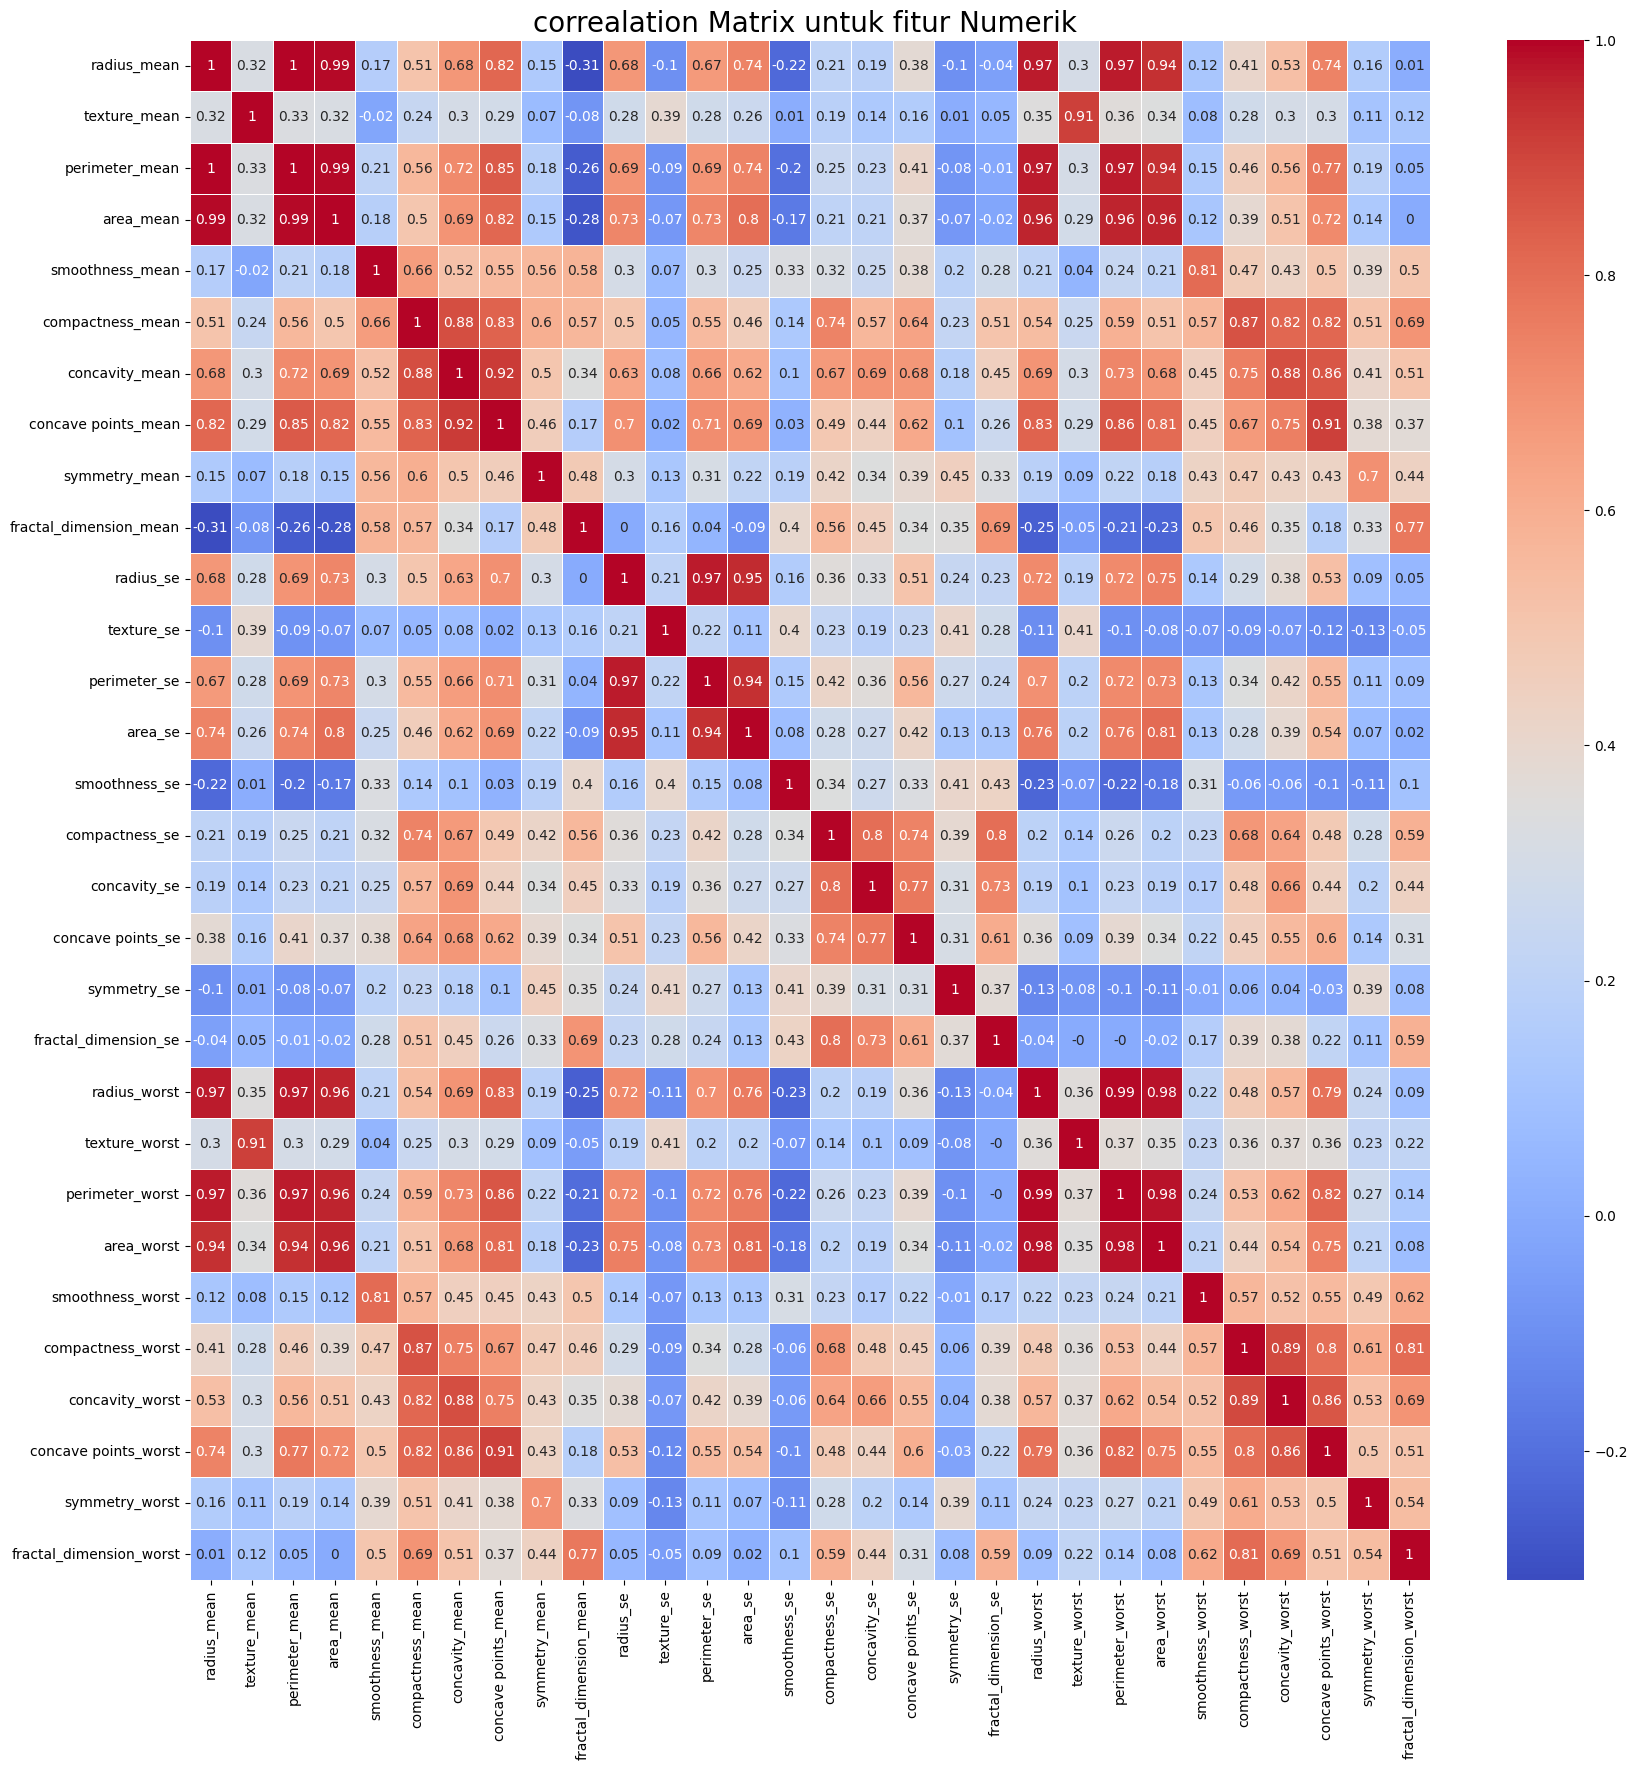

In [9]:
# Mwelihat corelasi dengan heatmap
plt.figure(figsize=(20,20))
correlation_matrix = df.corr().round(2)

# Untuk mengeprint nilai dalam kotak menggunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,)
plt.title("correalation Matrix untuk fitur Numerik ", size=20)

##### handling multicoliniearitas

In [10]:
df = df.drop(['radius_mean','texture_mean','perimeter_mean','area_mean',
              'radius_se','texture_se', 'perimeter_se', 'area_se' ,
              'radius_worst','texture_worst', 'perimeter_worst', 'area_worst'],axis=1)




#### Check Distribution

In [11]:
list (df.columns[1:])

['smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

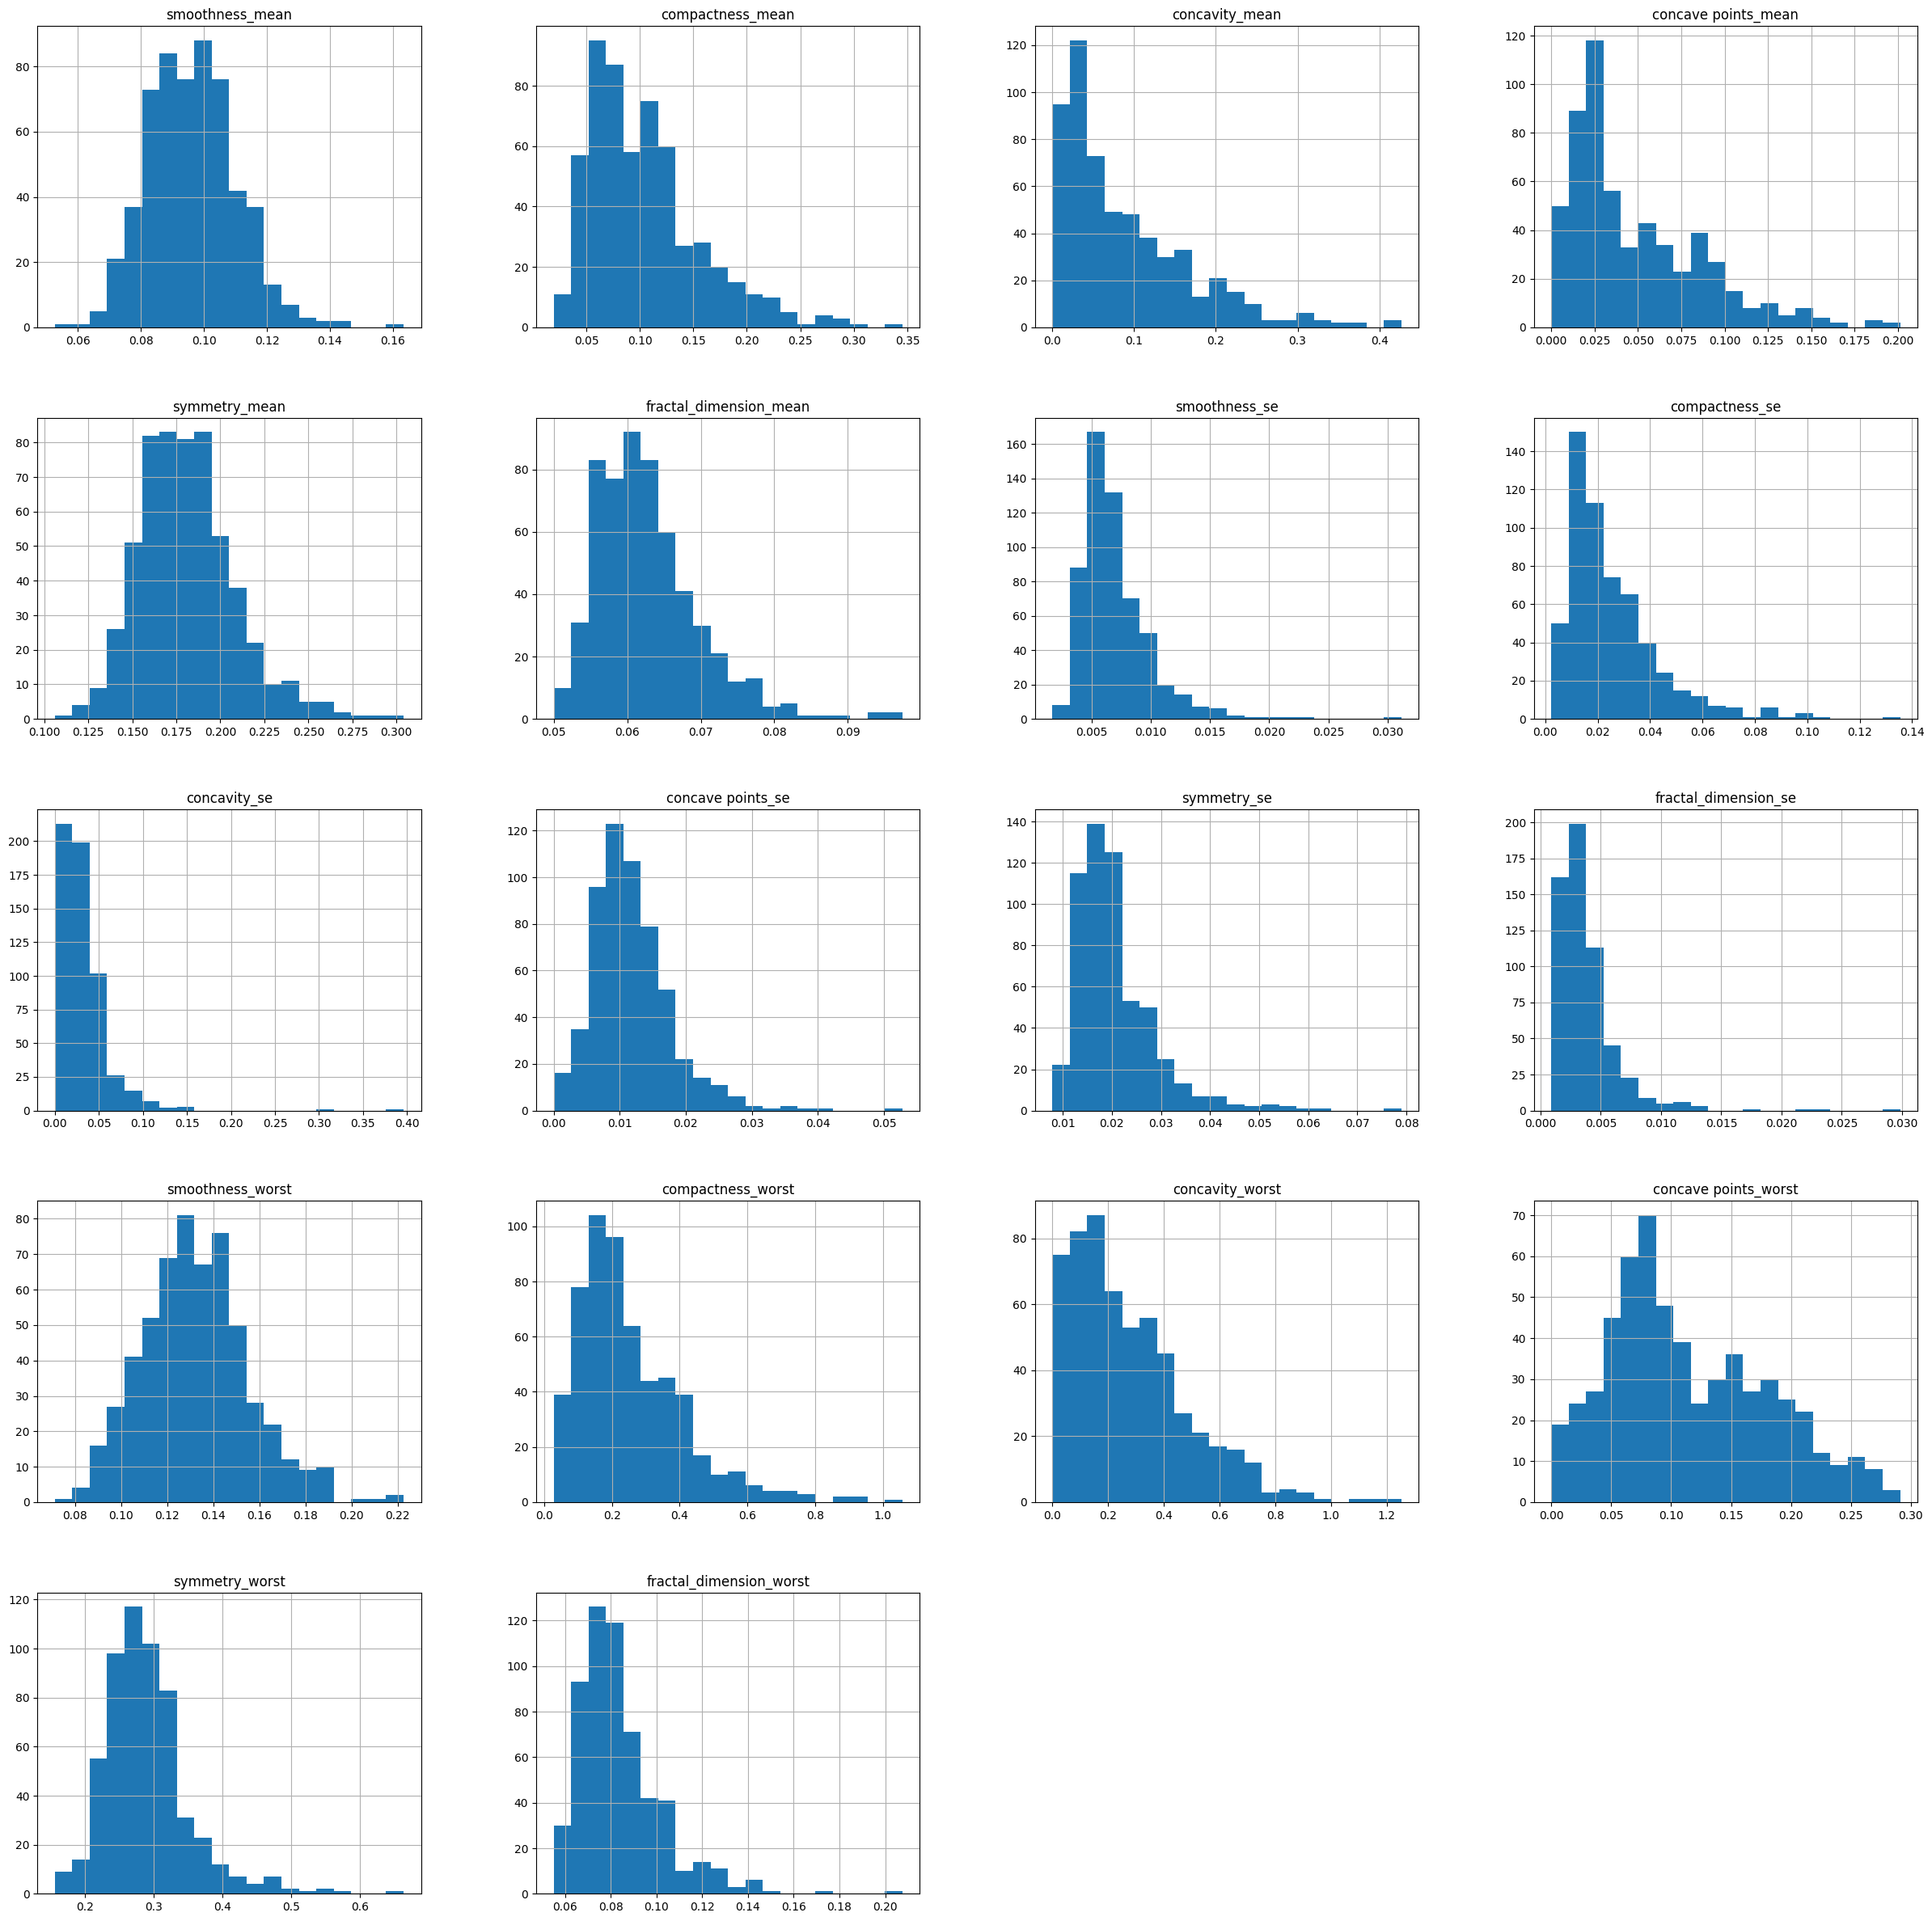

In [12]:
# Mengambil sampel beberapa kolom yang ingin dilihat distribusinya
kolom_distribusi = df[list (df.columns[1:])]
# Melihat distribusi data dengan histogram
kolom_distribusi.hist(bins=20, figsize=(30, 30))  # Anda dapat mengatur jumlah bins sesuai kebutuhan
plt.show()

In [ ]:

# Mengambil sampel beberapa kolom yang ingin dilihat distribusinya
kolom_distribusi = df[list(df.columns[1:])]

# Plot distribusi data menggunakan Seaborn
plt.figure(figsize=(12, 8))
for i, col in enumerate(kolom_distribusi.columns):
    plt.subplot(6, 3, i+1)  # Membuat tabel subplot 6 baris, 3kolom
    sns.histplot(kolom_distribusi[col], bins=20, kde=True)  # Menampilkan histogram dan KDE plot
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

In [ ]:
# Menghitung jumlah True)iment untuk tiap kategori
cm = sns.light_palette("green", as_cmap=True)
diagnosis_cat_count = df.groupby('diagnosis')['smoothness_mean'].count().reset_index().sort_values(by = 'smoothness_mean', ascending = False)
diagnosis_cat_count.style.background_gradient(cmap = 'Purples')

plt.figure(figsize = (12,8))
sns.countplot(x = 'diagnosis', data = df)
plt.show()

### Check Outlier

In [ ]:
df.describe()

In [ ]:
# Mengambil sampel beberapa kolom yang ingin dilihat distribusinya
kolom_distribusi = df[list(df.columns[1:])]

# Membuat displot menggunakan Seaborn
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(data=kolom_distribusi)
plt.xticks(rotation=45)
plt.show()

In [ ]:
def find_outlier(yourlist):
    outlier = ''
    for i in range(len(yourlist)):
        if yourlist[i] > batas_atas:
            outlier += str(yourlist[i]) + ', '
        if yourlist[i] < batas_bawah:
            outlier += str(yourlist[i]) + ', '
    return outlier

for j in df[list(df.columns[1:])] :
    # Q1 = df[j].describe()['25%']
    Q1 = df[j].describe()[4]
    # print (df[j].describe() == 66)

    Q3 = df[j].describe()['75%']
    IQR = Q3 - Q1
    batas_bawah= Q1-(1.5*IQR)
    batas_atas = Q3+(1.5*IQR)
    if find_outlier(df[j]) == '':
        print('Feature {} has no Outlier'.format(j))
    else:
        print('Feature {} has {} Outlier which is:'.format(j, (len(find_outlier(df[j]).split(',')))-1))
        print(find_outlier(df[j]))

In [ ]:

def find_outlier(yourlist):
    outliers = [str(x) for x in yourlist if x > batas_atas or x < batas_bawah]
    return ', '.join(outliers)

outlier_data = []

for j in df[list(df.columns[1:])]:
    Q1 = df[j].describe()[4]
    Q3 = df[j].describe()['75%']
    IQR = Q3 - Q1
    batas_bawah = Q1 - (1.5 * IQR)
    batas_atas = Q3 + (1.5 * IQR)
    outliers = find_outlier(df[j])

    status = 'No Outlier' if not outliers else 'Outlier'
    count = len(outliers.split(', ')) if outliers else 0
    outlier_data.append(['Feature', j, status, count, outliers])

outlier_df = pd.DataFrame(outlier_data, columns=['Type', 'Feature', 'Status', 'Count', 'Outliers'])
print(outlier_df)

In [ ]:

# Plot bar plot dengan Seaborndf[list (df.columns[1:])]
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Count', data=outlier_df)
plt.title('Jumlah Outlier per Fitur')
plt.xlabel('Fitur')
plt.ylabel('Jumlah Outlier')
plt.xticks(rotation=45)
plt.show()

#### handling Outlayer

In [ ]:
# Membuat salinan dataset
scaled_df = df.copy()
# Daftar fitur yang akan di-scale
features_to_scale = df.columns[1:]

In [ ]:
scaled_df.head(2)

In [ ]:
# Melakukan scaling menggunakan RobustScaler
robust_scaler = RobustScaler()
scaled_df[features_to_scale] = robust_scaler.fit_transform(df[features_to_scale])
print (scaled_df)
# Menyimpan hasil scaling RobustScaler ke dalam dataframe baru
robust_df = scaled_df.copy()


In [ ]:
robust_df.head(2)

In [ ]:
# Melakukan scaling menggunakan MinMaxScaler
minmax_scaler = MinMaxScaler()
scaled_df[features_to_scale] = minmax_scaler.fit_transform(df[features_to_scale])

# Menyimpan hasil scaling MinMaxScaler ke dalam dataframe baru
minmax_df = scaled_df.copy()

In [ ]:
minmax_df.head(2)

In [ ]:

# Melakukan scaling menggunakan StandardScaler
standard_scaler = StandardScaler()
scaled_df[features_to_scale] = standard_scaler.fit_transform(df[features_to_scale])

# Menyimpan hasil scaling StandardScaler ke dalam dataframe baru
standard_df = scaled_df.copy()

In [ ]:
standard_df.head(2)

##### Visualize

In [ ]:
# Mengambil sampel beberapa kolom yang ingin dilihat distribusinya
kolom_distribusi = robust_df[list(df.columns[1:])]

# Membuat displot menggunakan Seaborn
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(data=kolom_distribusi)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mengambil sampel beberapa kolom yang ingin dilihat distribusinya
kolom_distribusi = minmax_df[list(df.columns[1:])]

# Membuat displot menggunakan Seaborn
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(data=kolom_distribusi)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mengambil sampel beberapa kolom yang ingin dilihat distribusinya
kolom_distribusi = standard_df[list(df.columns[1:])]

# Membuat displot menggunakan Seaborn
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(data=kolom_distribusi)
plt.xticks(rotation=45)
plt.show()

### Encoding

In [ ]:
lE = LabelEncoder()
df['diagnosis'] = lE.fit_transform(df['diagnosis'])

In [ ]:
# 1: M
# 0: B
df.head(5)

In [ ]:
df.shape

### Model Klasifikasi 90 10

In [ ]:
scores = []

#### Model KLasifikasi dengan Robust

In [ ]:
# Bagi dataset menjadi train dan test (90% - 10%)
X = robust_df[list(robust_df.columns[1:])]
y = robust_df[list(robust_df.columns[0:1])].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=789)


In [ ]:
X.head()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

###### Tunning

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(random_state=789, gamma='auto'),
        'params' : {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
            'criterion': ["gini","entropy"],
            'max_depth' : range(1,10),
            'min_samples_leaf': range(2,10)
        }
    },
    'KNN' :{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    }
}



for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'scaller': 'Robust',
        'Confusion_Matrix': cm
    })


In [ ]:
model_params2 = {
    'svm': {
        'model': svm.SVC(random_state=789),
        'params' : {
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
        }
    }
}

In [ ]:

for model_name, mp in model_params2.items():
  seed = 789
  clf =  mp['model']
  print(model_name)
  print (clf)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print (accuracy)
  print(cm)

  scores.append({
        'model': model_name,
        'best_score': accuracy,
        'best_params': "default",
        'scaller': 'Robust',
        'Confusion_Matrix': cm
    })

result = pd.DataFrame(scores,columns=['model','best_score','best_params', 'scaller', 'Confusion_Matrix'])
result

##### Detail Model

###### Tree

In [ ]:
# Define model Decision Tree
tree_model = DecisionTreeClassifier(random_state=789)

# Train model Decision Tree tanpa tuning parameter
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Decision Tree tanpa tuning parameter:", accuracy_tree)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print (confusion_matrix_tree)

In [ ]:

# Tuning parameter Decision Tree dengan Randomized Search CV
param_dist_tree = { 'criterion': ["gini","entropy"],
                    'max_depth' : range(1,10),
                    'min_samples_leaf': range(2,10)}
random_search_tree = RandomizedSearchCV(tree_model, param_distributions=param_dist_tree, n_iter=10, cv=5)
random_search_tree.fit(X_train, y_train)
best_tree_model = random_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)
y_pred_tree_best = best_tree_model.predict(X_test)
accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
print("Accuracy Decision Tree dengan tuning parameter:", accuracy_tree_best)
confusion_matrix_tree_best = confusion_matrix(y_test, y_pred_tree_best)
print (confusion_matrix_tree_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree dengan tuning parameter')
plt.show()

###### KNN

In [ ]:
# Define model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Train model KNN tanpa tuning parameter
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN tanpa tuning parameter:", accuracy_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print (confusion_matrix_knn)

In [ ]:

# Tuning parameter KNN dengan Grid Search CV
param_grid_knn = {'n_neighbors': [1, 2, 3, 4, 5],
                  'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn_best = best_knn_model.predict(X_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Evaluasi hasil untuk model Decision knn dan KNN
print("Accuracy KNN dengan tuning parameter:", accuracy_knn_best)
confusion_matrix_knn_best = confusion_matrix(y_test, y_pred_knn_best)
print (confusion_matrix_knn_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn dengan tuning parameter')
plt.show()

###### SVM

In [ ]:
# Define model SVM
svm_model = SVC(random_state=789)

# Train model SVM tanpa tuning parameter
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM tanpa tuning parameter:", accuracy_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print (confusion_matrix_svm)

In [ ]:
# Tuning parameter SVM dengan Grid Search CV atau Randomized Search CV
param_grid_svm = {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_svm_best = best_svm_model.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)

# Evaluasi hasil untuk model SVM
print("Accuracy SVM dengan tuning parameter:", accuracy_svm_best)
confusion_matrix_svm_best = confusion_matrix(y_test, y_pred_svm_best)
print (confusion_matrix_svm_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm dengan tuning parameter')
plt.show()

###### Forest

In [ ]:
# Define model Random Forest
rf_model = RandomForestClassifier(random_state=789)

# Train model Random Forest tanpa tuning parameter
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest tanpa tuning parameter:", accuracy_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print (confusion_matrix_rf)

In [ ]:
# Tuning parameter Random Forest dengan Grid Search CV
param_grid_rf = {
    'n_estimators': [1,5,10]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

# Evaluasi hasil untuk model Random Forest
print("Accuracy Random Forest dengan tuning parameter:", accuracy_rf_best)
confusion_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
print(confusion_matrix_rf_best)

###### Regresi Logistik

In [ ]:
# Define model Regresi Logistik
rl_model = LogisticRegression(random_state=789)

# Train model Regresi Logistik tanpa tuning parameter
rl_model.fit(X_train, y_train)
y_pred_rl = rl_model.predict(X_test)
accuracy_rl = accuracy_score(y_test, y_pred_rl)
print("Accuracy Regresi Logistik tanpa tuning parameter:", accuracy_rl)
confusion_matrix_rl = confusion_matrix(y_test, y_pred_rl)
print (confusion_matrix_rl)

In [ ]:
# Tuning parameter Regresi Logistik dengan Grid Search CV atau Randomized Search CV
param_grid_rl = {
    'C': [1,5,10]
}

grid_search_rl = GridSearchCV(rl_model, param_grid_rl, cv=5)
grid_search_rl.fit(X_train, y_train)
best_rl_model = grid_search_rl.best_estimator_
best_rl_model.fit(X_train, y_train)
y_pred_rl_best = best_rl_model.predict(X_test)
accuracy_rl_best = accuracy_score(y_test, y_pred_rl_best)

# Evaluasi hasil untuk model Regresi Logistik
print("Accuracy Regresi Logistik dengan tuning parameter:", accuracy_rl_best)
confusion_matrix_rl_best = confusion_matrix(y_test, y_pred_rl_best)
print (confusion_matrix_rl_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl dengan tuning parameter')
plt.show()

#### Model KLasifikasi dengan Minmax

In [ ]:
# Bagi dataset menjadi train dan test (90% - 10%)
X = minmax_df[list(minmax_df.columns[1:])]
y = minmax_df[list(minmax_df.columns[0:1])].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=789)


In [ ]:
X.head()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Tunning

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(random_state=789, gamma='auto'),
        'params' : {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
            'criterion': ["gini","entropy"],
            'max_depth' : range(1,10),
            'min_samples_leaf': range(2,10)
        }
    },
    'KNN' :{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    }
}


for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    print (best_model)
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'scaller': 'Minmax',
        'Confusion_Matrix': cm
    })



In [ ]:
model_params2 = {
    'svm': {
        'model': svm.SVC(random_state=789),
        'params' : {
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
        }
    }
}

In [ ]:

for model_name, mp in model_params2.items():
  seed = 789
  clf =  mp['model']
  print(model_name)
  print (clf)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print (accuracy)
  print(cm)

  scores.append({
        'model': model_name,
        'best_score': accuracy,
        'best_params': "default",
        'scaller': 'Minmax',
        'Confusion_Matrix': cm
    })

result = pd.DataFrame(scores,columns=['model','best_score','best_params', 'scaller', 'Confusion_Matrix'])
result

##### Detail Model

###### Tree

In [ ]:
# Define model Decision Tree
tree_model = DecisionTreeClassifier(random_state=789)

# Train model Decision Tree tanpa tuning parameter
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Decision Tree tanpa tuning parameter:", accuracy_tree)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print (confusion_matrix_tree)

In [ ]:

# Tuning parameter Decision Tree dengan Randomized Search CV
param_dist_tree = { 'criterion': ["gini","entropy"],
                    'max_depth' : range(1,10),
                    'min_samples_leaf': range(2,10)}
random_search_tree = RandomizedSearchCV(tree_model, param_distributions=param_dist_tree, n_iter=10, cv=5)
random_search_tree.fit(X_train, y_train)
best_tree_model = random_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)
y_pred_tree_best = best_tree_model.predict(X_test)
accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
print("Accuracy Decision Tree dengan tuning parameter:", accuracy_tree_best)
confusion_matrix_tree_best = confusion_matrix(y_test, y_pred_tree_best)
print (confusion_matrix_tree_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree dengan tuning parameter')
plt.show()

###### KNN

In [ ]:
# Define model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Train model KNN tanpa tuning parameter
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN tanpa tuning parameter:", accuracy_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print (confusion_matrix_knn)

In [ ]:

# Tuning parameter KNN dengan Grid Search CV
param_grid_knn = {'n_neighbors': [1, 2, 3, 4, 5],
                  'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn_best = best_knn_model.predict(X_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Evaluasi hasil untuk model Decision knn dan KNN
print("Accuracy KNN dengan tuning parameter:", accuracy_knn_best)
confusion_matrix_knn_best = confusion_matrix(y_test, y_pred_knn_best)
print (confusion_matrix_knn_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn dengan tuning parameter')
plt.show()

###### SVM

In [ ]:
# Define model SVM
svm_model = SVC(random_state=789)

# Train model SVM tanpa tuning parameter
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM tanpa tuning parameter:", accuracy_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print (confusion_matrix_svm)

In [ ]:
# Tuning parameter SVM dengan Grid Search CV atau Randomized Search CV
param_grid_svm = {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_svm_best = best_svm_model.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)

# Evaluasi hasil untuk model SVM
print("Accuracy SVM dengan tuning parameter:", accuracy_svm_best)
confusion_matrix_svm_best = confusion_matrix(y_test, y_pred_svm_best)
print (confusion_matrix_svm_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm dengan tuning parameter')
plt.show()

###### Forest

In [ ]:
# Define model Random Forest
rf_model = RandomForestClassifier(random_state=789)

# Train model Random Forest tanpa tuning parameter
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest tanpa tuning parameter:", accuracy_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print (confusion_matrix_rf)

In [ ]:
# Tuning parameter Random Forest dengan Grid Search CV
param_grid_rf = {
    'n_estimators': [1,5,10]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

# Evaluasi hasil untuk model Random Forest
print("Accuracy Random Forest dengan tuning parameter:", accuracy_rf_best)
confusion_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
print(confusion_matrix_rf_best)

###### Regresi Logistik

In [ ]:
# Define model Regresi Logistik
rl_model = LogisticRegression(random_state=789)

# Train model Regresi Logistik tanpa tuning parameter
rl_model.fit(X_train, y_train)
y_pred_rl = rl_model.predict(X_test)
accuracy_rl = accuracy_score(y_test, y_pred_rl)
print("Accuracy Regresi Logistik tanpa tuning parameter:", accuracy_rl)
confusion_matrix_rl = confusion_matrix(y_test, y_pred_rl)
print (confusion_matrix_rl)

In [ ]:
# Tuning parameter Regresi Logistik dengan Grid Search CV atau Randomized Search CV
param_grid_rl = {
    'C': [1,5,10]
}

grid_search_rl = GridSearchCV(rl_model, param_grid_rl, cv=5)
grid_search_rl.fit(X_train, y_train)
best_rl_model = grid_search_rl.best_estimator_
best_rl_model.fit(X_train, y_train)
y_pred_rl_best = best_rl_model.predict(X_test)
accuracy_rl_best = accuracy_score(y_test, y_pred_rl_best)

# Evaluasi hasil untuk model Regresi Logistik
print("Accuracy Regresi Logistik dengan tuning parameter:", accuracy_rl_best)
confusion_matrix_rl_best = confusion_matrix(y_test, y_pred_rl_best)
print (confusion_matrix_rl_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl dengan tuning parameter')
plt.show()

#### Model KLasifikasi dengan Standart

In [ ]:
# Bagi dataset menjadi train dan test (90% - 10%)
X = standard_df[list(standard_df.columns[1:])]
y = standard_df[list(standard_df.columns[0:1])].values.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=789)


In [ ]:
X.head()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Tunning

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(random_state=789, gamma='auto'),
        'params' : {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
            'criterion': ["gini","entropy"],
            'max_depth' : range(1,10),
            'min_samples_leaf': range(2,10)
        }
    },
    'KNN' :{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    }
}


for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'scaller': 'Standard',
        'Confusion_Matrix': cm

    })


In [ ]:
model_params2 = {
    'svm': {
        'model': svm.SVC(random_state=789),
        'params' : {
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
        }
    }
}

In [ ]:

for model_name, mp in model_params2.items():
  seed = 789
  clf =  mp['model']
  print(model_name)
  print (clf)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print (accuracy)
  print(cm)

  scores.append({
        'model': model_name,
        'best_score': accuracy,
        'best_params': "default",
        'scaller': 'Standard',
        'Confusion_Matrix': cm
    })

result = pd.DataFrame(scores,columns=['model','best_score','best_params', 'scaller', 'Confusion_Matrix'])
result

##### Detail Model

###### Tree

In [ ]:
# Define model Decision Tree
tree_model = DecisionTreeClassifier(random_state=789)

# Train model Decision Tree tanpa tuning parameter
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Accuracy Decision Tree tanpa tuning parameter:", accuracy_tree)
confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print (confusion_matrix_tree)

In [ ]:

# Tuning parameter Decision Tree dengan Randomized Search CV
param_dist_tree = { 'criterion': ["gini","entropy"],
                    'max_depth' : range(1,10),
                    'min_samples_leaf': range(2,10)}
random_search_tree = RandomizedSearchCV(tree_model, param_distributions=param_dist_tree, n_iter=10, cv=5)
random_search_tree.fit(X_train, y_train)
best_tree_model = random_search_tree.best_estimator_
best_tree_model.fit(X_train, y_train)
y_pred_tree_best = best_tree_model.predict(X_test)
accuracy_tree_best = accuracy_score(y_test, y_pred_tree_best)
print("Accuracy Decision Tree dengan tuning parameter:", accuracy_tree_best)
confusion_matrix_tree_best = confusion_matrix(y_test, y_pred_tree_best)
print (confusion_matrix_tree_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_tree_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree dengan tuning parameter')
plt.show()

###### KNN

In [ ]:
# Define model K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Train model KNN tanpa tuning parameter
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN tanpa tuning parameter:", accuracy_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print (confusion_matrix_knn)

In [ ]:

# Tuning parameter KNN dengan Grid Search CV
param_grid_knn = {'n_neighbors': [1, 2, 3, 4, 5],
                  'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
best_knn_model = grid_search_knn.best_estimator_
best_knn_model.fit(X_train, y_train)
y_pred_knn_best = best_knn_model.predict(X_test)
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Evaluasi hasil untuk model Decision knn dan KNN
print("Accuracy KNN dengan tuning parameter:", accuracy_knn_best)
confusion_matrix_knn_best = confusion_matrix(y_test, y_pred_knn_best)
print (confusion_matrix_knn_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_knn_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision knn dengan tuning parameter')
plt.show()

###### SVM

In [ ]:
# Define model SVM
svm_model = SVC(random_state=789)

# Train model SVM tanpa tuning parameter
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy SVM tanpa tuning parameter:", accuracy_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print (confusion_matrix_svm)

In [ ]:
# Tuning parameter SVM dengan Grid Search CV atau Randomized Search CV
param_grid_svm = {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_svm_best = best_svm_model.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)

# Evaluasi hasil untuk model SVM
print("Accuracy SVM dengan tuning parameter:", accuracy_svm_best)
confusion_matrix_svm_best = confusion_matrix(y_test, y_pred_svm_best)
print (confusion_matrix_svm_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_svm_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision svm dengan tuning parameter')
plt.show()

###### Forest

In [ ]:
# Define model Random Forest
rf_model = RandomForestClassifier(random_state=789)

# Train model Random Forest tanpa tuning parameter
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy Random Forest tanpa tuning parameter:", accuracy_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print (confusion_matrix_rf)

In [ ]:
# Tuning parameter Random Forest dengan Grid Search CV
param_grid_rf = {
    'n_estimators': [1,5,10]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
best_rf_model.fit(X_train, y_train)
y_pred_rf_best = best_rf_model.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)

# Evaluasi hasil untuk model Random Forest
print("Accuracy Random Forest dengan tuning parameter:", accuracy_rf_best)
confusion_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
print(confusion_matrix_rf_best)

###### Regresi Logistik

In [ ]:
# Define model Regresi Logistik
rl_model = LogisticRegression(random_state=789)

# Train model Regresi Logistik tanpa tuning parameter
rl_model.fit(X_train, y_train)
y_pred_rl = rl_model.predict(X_test)
accuracy_rl = accuracy_score(y_test, y_pred_rl)
print("Accuracy Regresi Logistik tanpa tuning parameter:", accuracy_rl)
confusion_matrix_rl = confusion_matrix(y_test, y_pred_rl)
print (confusion_matrix_rl)

In [ ]:
# Tuning parameter Regresi Logistik dengan Grid Search CV atau Randomized Search CV
param_grid_rl = {
    'C': [1,5,10]
}

grid_search_rl = GridSearchCV(rl_model, param_grid_rl, cv=5)
grid_search_rl.fit(X_train, y_train)
best_rl_model = grid_search_rl.best_estimator_
best_rl_model.fit(X_train, y_train)
y_pred_rl_best = best_rl_model.predict(X_test)
accuracy_rl_best = accuracy_score(y_test, y_pred_rl_best)

# Evaluasi hasil untuk model Regresi Logistik
print("Accuracy Regresi Logistik dengan tuning parameter:", accuracy_rl_best)
confusion_matrix_rl_best = confusion_matrix(y_test, y_pred_rl_best)
print (confusion_matrix_rl_best)

In [ ]:
# Visualisasi Confusion Matrix dengan Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl tanpa tuning parameter')
plt.show()

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Atur skala font
sns.heatmap(confusion_matrix_rl_best, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16})

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision rl dengan tuning parameter')
plt.show()

# d

### Model Klasifikasi 80 20

In [ ]:
score =[]
result = pd.DataFrame(columns=['model', 'test', 'best_score', 'best_params', 'scaler', 'Confusion_Matrix'])

In [ ]:
score

In [ ]:
if score.empty:
    print("DataFrame is empty")
else:
    print("DataFrame is not empty")

In [ ]:
result.head()

##### Tunning

In [ ]:
scaler_md_name = {
    'robust': {
        'scaler': RobustScaler(),
        'params' : {
        }
    },
    'minmax': {
        'scaler': MinMaxScaler(),
        'params' : {
        }
    },
    'standard' : {
        'scaler': StandardScaler(),
        'params': {
        }
    }
}

In [ ]:
model_params1 = {
    'svm': {
        'model': svm.SVC(random_state=789),
        'params' : {
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
        }
    }
}

In [ ]:
model_params2 = {
    'svm': {
        'model': svm.SVC(random_state=789, gamma='auto'),
        'params' : {
            'gamma' : ['auto','scale'],
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly','sigmoid']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(random_state=789),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Decision_Tree' : {
        'model': DecisionTreeClassifier(random_state=789),
        'params': {
            'criterion': ["gini","entropy"],
            'max_depth' : range(1,10),
            'min_samples_leaf': range(2,10)
        }
    },
    'KNN' :{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [1, 2, 3, 4, 5],
            'weights': ['uniform', 'distance']
        }
    }
}



###### Modeling

In [ ]:
# Bagi dataset menjadi train dan test (90% - 10%)
test_size = 0.1
seed = 789

for scaler_md_name, scl in scaler_md_name.items():
  scaled_df = df.copy()
  print (scaler_md_name)
  features_to_scale = df.columns[1:]
  scaled_df [features_to_scale]= scl['scaler'].fit_transform(scaled_df [features_to_scale])
  X = scaled_df[list(scaled_df.columns[1:])]
  y = scaled_df[list(scaled_df.columns[0:1])].values.ravel()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

  for model_name, mp in model_params1.items():
    clf =  mp['model']
    print(model_name)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    scores.append({
        'model': model_name,
        'best_score': accuracy,
        'best_params': "default",
        'scaller': scaler_md_name,
        'Confusion_Matrix': cm,
        'test': 11111
      })


  for model_name, mp in model_params2.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    best_model = clf.best_estimator_
    print (best_model)
    y_pred = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'scaller': scaler_md_name,
        'Confusion_Matrix': cm,
        'test': 2222222
      })

result = pd.DataFrame(scores,columns=['model', 'test','best_score','best_params', 'scaller', 'Confusion_Matrix'])




#### coba2

In [ ]:

for model_name, mp in model_params2.items():
  seed = 789
  clf =  mp['model']
  print(model_name)
  print (clf)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  print (accuracy)
  print(cm)

  scores.append({
        'model': model_name,
        'best_score': accuracy,
        'best_params': "default",
        'scaller': 'Robust',
        'Confusion_Matrix': cm
    })

result = pd.DataFrame(scores,columns=['model','best_score','best_params', 'scaller', 'Confusion_Matrix'])
result

In [ ]:
# for scaler_name, scl in scaler_name.items():
#   seed = 789
#   clf =  scl['scaler']
#   print(model_name)
#   print(clf)

In [ ]:
# Membuat salinan dataset
scaled_df = df.copy()
# Daftar fitur yang akan di-scale
features_to_scale = df.columns[1:]
# menyimpan dalam bentuk dataframe
scaled_df [features_to_scale]= scaler_name['robust']['scaler'].fit_transform(scaled_df [features_to_scale])

In [ ]:
scaled_df [features_to_scale]= scaler_name['robust']['scaler'].fit_transform(scaled_df [features_to_scale])

In [ ]:
scaled_df

## Result

In [ ]:
result

In [ ]:
# Data DataFrame result yang telah Anda buat
result = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'scaller', 'Confusion_Matrix'])

# Plot menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='scaller', y='best_score', hue='model', data=result, palette='viridis')

plt.title('Perbandingan Nilai Akurasi Terbaik (Best Score) berdasarkan Model dan Scaler')
plt.xlabel('Model')
plt.ylabel('Best Score (Akurasi Terbaik)')
plt.xticks(rotation=45)
plt.legend(title='Scaler')
plt.show()

In [ ]:
# Tambahkan kolom 'Best Params Type' berdasarkan 'best_params'
result['Best Params Type'] = result['best_params'].apply(lambda x: 'Default' if x == 'default' else 'Tuning')

result

In [ ]:

# Plot menggunakan Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='scaller', y='best_score', hue='Best Params Type', data=result, palette='viridis')

plt.title('Perbandingan Nilai Akurasi Terbaik (Best Score) berdasarkan Model dan Scaler')
plt.xlabel('Model')
plt.ylabel('Best Score (Akurasi Terbaik)')
plt.xticks(rotation=45)
plt.legend(title='Scaler')
plt.show()